# <font face="Verdana" size=6 color='#6495ED'> ANÁLISE ESTATÍSTICA DE DADOS

<font face="Verdana" size=3 color='#40E0D0'> Profs. Larissa Driemeier e Arturo Forner-Cordero

<center><img src='https://drive.google.com/uc?export=view&id=1CJsooGWXxTqWw0VeGAoroNb509nYKiRK' width="800"></center>

Este notebook faz parte da aula [08](https://alunoweb.net/moodle/pluginfile.php/141064/mod_resource/content/4/EST_08_Y2024.pdf) do curso IAD-001.



In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.core.function_base import linspace
from numpy.random import binomial
from numpy.random import multinomial
from scipy.stats import bernoulli, binom, geom, poisson
from scipy.stats import multinomial as multinom
colors=['darkblue','darkred','darkolivegreen','darkmagenta']
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# Teorema de Bayes

Pode parecer que o teorema de Bayes é algo mágico, quase místico: um pouco de matemática que, de certa forma, avalia as informações disponíveis e fornece as chances de uma determinada situação...

Mas esse místico tem mais a ver com sua reputação e aplicações avançadas do que o núcleo real dele - derivá-lo é  notavelmente simples e direto. Fizemos isso em na aula anterior e não custa nada repetirmos aqui ...

## Lei da Probabilidade Total

Por definição, a probabilidade total de todos os $n$ resultados (eventos) possíveis para uma variável (espaço amostral) $A$ vale:

$$P(A) = \sum_n P(A_n) = 1$$


A lei da probabilidade total leva isso adiante. Considerando-se dois espaços amostrais ($A$ e $B$), a lei da probabilidade total e relaciona suas probabilidades marginais (suas probabilidades consideradas independentemente, sem referência uma à outra) com suas probabilidades condicionais (suas probabilidades consideradas em conjunto). Uma probabilidade marginal é simplesmente, p. ex., $P(A)$, enquanto uma probabilidade condicional é $P(B|A)$, que lê-se "probabilidade de $B$ *dado que* $A$ ocorreu".

A lei da probabilidade total diz que  a probabilidade total de $A$ é igual à soma da probabilidade condicional de $A$ em qualquer evento $B_n$ vezes a probabilidade desse evento $B_n$, para todos os eventos possíveis em $B$ .

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

##  Lei da Probabilidade Condicionada

Para determinarmos a probabilidade de um evento condicionado à ocorrência de outro, devemos apelar voltar à teoria dos conjuntos e pensar na interseção dos conjuntos:

$$P(B|A) = \frac{P(B \cap A)}{P(A)}$$

Multiplica-se os dois lados da equação acima por $P(A)$, de modo que $P(B|A)P(A) = P(B \cap A)$. Pode-se repetir o raciocínio para $P(A|B)$ e, portanto,  concluir que $P(A|B)P(B) = P(A \cap B) = P(B \cap A)$


## Teorema

A regra de Bayes serve para calcular a probabilidade condicional de $H$: $p(H | E)$ a partir da probabilidade condicional de ${p(E|H)}$, com $H$ sendo a hipótese que estamos testando e $E$ sendo o evento que já ocorreu. Ou seja, o teorema de Bayes pode ser escrito como:
$$
\color{firebrick}{p(H|E)=p(H) \frac{p(E|H)}{p(E)}}
$$

Isso pode ser muito útil em caso de incerteza do evento, por exemplo, se eu perguntar: você acha que eu vou a pé para o meu trabalho? Inicialmente, você pode supor algo como uma probabilidade de $40%$ de eu ir a pé para o meu local de trabalho. No entanto, se eu lhe der informações adicionais, como minha casa fica a dez minutos a pé do meu local de trabalho, a probabilidade de eu realmente ir a pé se torna alta. Se, ao contrário, eu disser que minha casa fica a mais de 6 km do meu escritório, a probabilidade de eu ir a pé para lá se torna pequena. Esta é a probabilidade condicional, a probabilidade de eu ir a pé para o meu local de trabalho, dado que meu local de trabalho fica a dez minutos a pé da minha casa.

p(H) a priori: reflete nossa crença, o que sabemos sobre o valor do parâmetro de interesse antes de dar uma olhada nos dados. Em nosso exemplo anterior, este é nosso palpite inicial de 40% de chances de eu ir a pé para o meu local de trabalho.

p(E|H) verossimilhança: probabilidade de observar a evidência quando nossa hipótese H está correta. Em outras palavras: qual é a probabilidade de observar nossos dados, dada nossa crença inicial (ou hipótese)? Em nosso exemplo, a evidência é a distância entre minha casa e o escritório. Qual é a probabilidade de meu local de trabalho estar a apenas dez minutos a pé da minha casa, se eu for a pé para o meu local de trabalho?

p(H|E) a posteriori: este é o resultado da análise bayesiana: contém todo o nosso conhecimento sobre um determinado problema, juntamente com nosso modelo e nossos dados. Em nosso exemplo, qual é a probabilidade de eu ir a pé para o meu local de trabalho, dado que meu local de trabalho está a dez minutos a pé da minha casa?

p(E) evidência: probabilidade marginal de observar nossos dados em qualquer situação possível, independentemente de nossa hipótese. É conhecido como fator de normalização, pois garante que a probabilidade a posteriori esteja entre $0-1$.

<img src='https://drive.google.com/uc?export=view&id=12sA6tTqj-4utAM1rrIg3BjphI3knO9Ob' width="700">

As $p(E)$ is a normalization factor,
$$
p(H|E) \propto p(E|H) * p(H)
$$

## Exemplo do Bafômetro

Você sabe que $8\%$ dos testes de bafômetro são positivos. Suponha $100\%$ de verdadeiros positivos (detectar __todos__ os motoristas bêbados que fizerem o teste).

Digamos que a taxa de motoristas embriagados (e, portanto, nossa crença inicial) é de $1\%$.

![Bafometro](https://drive.google.com/uc?export=view&id=1IT40Yyn5y0axN7h7OxbsOJL1D4-pRNfd)
$$
\begin{aligned}
P(P | E) &= 1.\\
P(E) &= 0.01\\
P(nE) &= 1.- P(E)=0.99\\
P(P) &= 0.08\\
P(nP) &= 1.0 - P(P)=0.92\\
\end{aligned}
$$

Qual é a probabilidade de alguém realmente estar embriagado se o teste der positivo?
$$
\begin{aligned}
P(E| P) &= P(E)\frac{P(P | E)}{P(P)} \\
&= \frac{1 \times 0.01}{0.08} \\
&= 0.125 = 12.5\%
\end{aligned}
$$
onde $E$ refere-se a Embriagado e $P$ refere-se a Positivo.

In [ ]:
p_P_dado_E = 1.
p_E = 0.01
p_nE = 1.- p_E
p_P = 0.08
p_nP = 1.0 - p_P
print('Probabilidade de estar embriagado, dado que deu positivo é: {:5.2%}'.format(p_P_dado_E*p_E/(p_P)))

Você pode pensar que exatos $100\%$ de verdadeiros positivos (detectar alguém que está bêbado) é muito bom, mas e se ele também tiver falso positivo (indicando que alguém está bêbado quando não está)?

A probabilidade de falsos positivos é,
$$
\begin{aligned}
P(P) &= P(P|E) P(E)+P(P|nE)P(nE) \\
P(P|nE) &= \frac{P(P) - P(P|E)P(E)}{P(nE)} \\
&= \frac{0.08 - 1 \times 0.01}{0.99} \\
&= 0.0707 = 7.07\%
\end{aligned}
$$

O Teorema de Bayes, portanto,nos ajuda a quantificar o ceticismo e nos permite ter um entendimento mais claro do problema. Originalmente, pensávamos que a probabilidade de o motorista estar embriagado era bastante alta, mas agora vemos que é apenas cerca de $12.5\%$.

Deve-se ressaltar que existem alguns pontos importantes, e o principal, nesse caso, é a aleatoriedade do teste. Isto é, o motorista foi parado por causa da maneira que estava dirigindo, decidiram fazer o bafômetro pela atitude do motorista, a área da blitz é uma área próxima a bares?

Veja mais detalhes sobre o teorema de Bayes e o exemplo usado aqui em [testes de bafômetro](https://www.bayestheorem.net/breathalyzer-example/).

In [ ]:
print('Probabilidade de falso positivo é: {:5.2%}'.format((p_P-p_P_dado_E*p_E)/p_nE))

#Distribuições de probabilidade para variáveis discretas

Antes de começarmos a falar sobre distribuições, vamos recordar o que são distribuições de probabilidade.

A **distribuição de probabilidades**, ou **modelo probabilístico**, indica, para uma variável aleatória, **quais são os resultados que podem ocorrer** e **qual é a probabilidade de cada resultado acontecer**.

Uma função de massa de probabilidade (PMF, do inglês, *probability mass function*), $P(x)$, descreve a probabilidade de uma variável discreta obter $X$ o valor $x$. A variável $x$ assume $n$ valores discretos, de modo que,
\begin{align}
\sum_{x=x_1}^{x_n} P(x) = 1.
\end{align}

Uma função de distribuição acumulativa (CDF, do inglês, *cumulative distribution function*), denominada $F(X)$, é definida como a probabilidade de que uma variável $X$ assuma valores menores ou iguais a $x$.

Em geral, para uma distribuição discreta

\begin{align}
F(x) = \sum_{x_i=x_1}^x P(x_i),
\end{align}


## Valor esperado e variância

O valor esperado de uma variável aleatória discreta pode ser obtido como o somatório da multiplicação de cada valor $x_i$ por sua probabilidade de ocorrência, definida como $P(x_i)$

\begin{align}
E[X] = \sum_{i=1}^n x_i P(x_i),
\end{align}

A variância e o desvio padrão são medidas de quanto os resultados probabilísticos se desviam do valor esperado. Assumindo que o valor esperado $E[X]$ da variável foi calculado, a variância de uma variável aleatória $X$ é igual ao valor esperado do quadrado de $X$ menos o valor esperado de $X$ ao quadrado,
\begin{align}
s_x^2 &= \textrm{Var}(X)=E[X^2]-(E[X])^2.
\end{align}

O desvio padrão de uma variável aleatória, $s_x$, é a raiz quadrada da variância.

### Porque estamos falando de *valor esperado* e não média?


O Valor Esperado é usado no caso de Variáveis Aleatórias (ou em outras palavras, *Distribuições de Probabilidade*).

Sabe-se que a *média* é definida como a soma de todos os elementos dividida pela soma de suas frequências. Mas, para o caso da distribuição de probabilidade, não podemos descrever uma variável aleatória em termos de sua frequência de antemão, portanto, usamos a probabilidade. Conceitualmente, a probabilidade de um elemento é a frequência de um evento dividida pelo tamanho do espaço amostral. Assim, a média no caso de variável aleatória pode ser dada pela soma das multiplicações de cada evento pela respectiva probabilidade. Nesse caso, $P(x_i)*x_i$ é conceitualmente a frequência de $x_i$ dividida pela frequência total.

A média, por outro lado, é usada no caso em que temos o conhecimento das frequências dos elementos individuais e da contagem total dos elementos, por exemplo, no caso de um conjunto de dados ou amostra conhecido. Podemos simplesmente usar a definição fundamental de média para calculá-la.

Observe que temos, em geral,

\begin{equation}
\bar{X}=\frac{\sum_{k=1}^n x_k}{n}\neq E(X).
\end{equation}


Mas, a média dos experimentos tende ao valor esperado quando o número de experimentos tende ao infinito. Esse comportamento também é chamado de *lei dos grandes números*, mas isso não pe assunto para nós...

Veja o exemplo: seja $X$ o resultado de um lançamento de um dado de seis faces não viciado. Os valores possíveis para $X$ são $1, 2, 3, 4, 5$ e $6$, cada um com probabilidade de ocorrência de $1/6$. O valor esperado de $X$ é então dado por

$$
E(X) = 1\times\frac{1}{6}+2\times\frac{1}{6}+3\times\frac{1}{6}+4\times\frac{1}{6}+5\times\frac{1}{6}+6\times\frac{1}{6} = \frac{21}{6} = 3.5
$$

Suponha que em uma sequência de dez jogadas do dado, se os resultados forem $5, 2, 6, 2, 2, 1, 2, 3, 6, 1$, então a média (média aritmética) dos resultados é dada por
$$
\bar{X} = \frac{5+2+6+2+2+1+2+3+6+1}{10} = 3.0
$$

Dizemos que o valor médio é $3.0$, com a distância de $0.5$ do valor esperado de $3.5$. Se jogarmos o dado $n$ vezes, onde $n$ é muito grande, então a média convergirá para o valor esperado, ou seja, $\bar{X}= E(X)$. Isso ocorre evidentemente porque, quando $n$ é muito grande, cada valor possível de $X $(ou seja, 1 a 6) ocorrerá com igual probabilidade de $1/6$, transformando a média no valor esperado.

## Distribuições discretas

Apresentaremos PMFs e CDFs para as distribuições abaixo:
*   Bernoulli
*   Binomial
*   Multinomial
*   Geométrica
*   Poisson

## Amostragem
Dado que conhecemos uma distribuição de probabilidade, podemos extrair amostras dela. Isso significa que podemos obter números aleatoriamente e a probabilidade de obter um determinado número $x$ é proporcional a PMF ou $P(x)$.

Sugestão de [leitura complementar](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2016/tutorials/t3b_probability_stories.html#Bernoulli-distribution).



## Distribuição Bernoulli

Muitas vezes, tem-se situações onde um experimento tem dois resultados possíveis: sucesso $(x = 1,\text{True})$ ou fracasso $(x = 0,\text{False})$. Repetindo-se o experimento uma única vez, a distribuição de Bernoulli define a probabilidade de obter cada resultado.

A distribuição de Bernoulli é parametrizada por um único valor, $p$, que define a probabilidade de sucesso.

Função de massa de probabilidade (PMF) é dada por,

\begin{align}
P(x;p) = \left\{ \begin{array}{ccc}
1-p & & x = 0 \\[0.5em]
p & & x = 1 \\[0.5em]
0 & & \text{otherwise.}
\end{array}
\right.
\end{align}

Usaremos a função `bernoulli` (`from scipy.stats`), com uma probabilidade de sucesso de $p=0.3$.

A Função de Massa de Probabilidade .pmf() (do inglês, Probability Mass Function) encontra a probabilidade de um evento em um ponto específico da distribuição. A função é definida apenas em distribuições discretas onde cada evento tem uma probabilidade fixa de ocorrer.

In [ ]:
# Variáveis de entrada:
# Probabilidade de sucesso de cada experimento, p
p = 0.3
X = bernoulli(p)
prob1 = X.pmf(1)
prob0 = X.pmf(0)
print('A probabilidade de sucesso em 1 evento é {:.0%} e probabilidade de fracasso é {:.0%}'.format(prob1,prob0))

O interessante de Bernoulli é quando usamos para simular dados. Por exemplo, simula-se 10000 experimentos com nossa variável aleatória.

Usaremos a função `bernoulli.rsv` (`from scipy.stats`). `rvs` é uma abreviação, do inglês, para *Random Variable Sampling*.

In [ ]:
# Número de repetições do evento
k = 10000
# Probabilidade de sucesso de cada experimento, p
p = 0.3
X = bernoulli(p)
X_samples = X.rvs(size=k) #
print('Veja que a resposta é sucesso ou fracasso, para cada uma das %d simulações do evento:'%(k))
print(X_samples)

heads = [np.sum(X_samples) for i in range(len(X_samples)) if i == 1]
tails = k - heads[0]
print('Número de caras: ','{:6.1f}'.format(heads[0]), '    Número de coroas: ', '{:6.1f}'.format(tails))

# Valor esperado e variância
print("Valores esperados para Distribuição de Bernoulli:")
print('Valor esperado={:5.3f}, Variância={:5.3f}'.format(p, p*(1-p)))
print("Modelo randômico de dados com distribuição de Bernoulli:")
print('Média={:5.3f}, Variância={:5.3f}'.format(X_samples.mean(), (X_samples.std())**2))

# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(X_samples, bins=np.linspace(0,2,3), color=colors[0])
ax.set_xlabel("Número de caras",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16);


Podemos comparar nossa média calculada do experimento com a média teórica que acabamos de derivar. Eles são de fato muito próximos e se aproximam à medida que o tamanho da amostra aumenta. Mude o valor (atualmente 10000) e verifique o resultado.

## Distribuição binomial


Podemos olhar para uma distribuição binomial como um conjunto de experimentos ou tentativas de Bernoulli, nossa compreensão de como as propriedades da distribuição são derivadas torna-se significativamente mais simples.

As principais condições que precisam ser cumpridas para definir noss distribuição binomial:
* Os ensaios são independentes;
* Cada tentativa pode ser classificada como sucesso ou fracasso;
* Há um número fixo de tentativas;
* A probabilidade de sucesso em cada tentativa é constante.


Realizamos $n$ ensaios de Bernoulli com probabilidade $p$ de sucesso. O número de sucessos, $x$, é um número positivo, inteiro, e distribuído binomialmente. Portanto, existem dois parâmetros: a probabilidade $p$ de sucesso para cada tentativa de Bernoulli e o número de ensaios, $n$.

Função de massa de probabilidade é dada por,
\begin{align}
P(x;n,p) = \begin{pmatrix}
n \\
x
\end{pmatrix}
p^x (1-p)^{n-x}.
\end{align}
onde
\begin{align}
\begin{pmatrix}
n \\
x
\end{pmatrix}=\frac{n!}{x!(n-x)!}
\end{align}
e
$$
x! = x \times (x-1) \times (x-2) \times \cdots \times 1
$$

Particularmente, $0!=1$.

### Exemplo

Vamos supor que eu jogue uma moeda não viciada 10 vezes. O sucesso é o número de caras. Qual a probabilidade de eu obter $0,1,2,3,4,5,6,7,8,9$ e $10$ sucessos no evento?


In [ ]:
# Variáveis de entrada:
# Número de eventos independentes, n
n = 10
# Probabilidade de sucesso de cada experimento, p
p = 0.5

Y = binom(n,p)

In [ ]:
probabilities = []
for i in range(n+1):
  # Número de sucessos, x = i
  print('Probabilidade de {:3d} sucesso(s) no evento: {:.2%}'.format(i,Y.pmf(i)))
  probabilities.append([i,Y.pmf(i)])

prob = np.array(probabilities)

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(prob[:,0],prob[:,1], color = colors[1])
plt.xlabel("Número de caras",fontsize=16)
plt.ylabel("Probabilidade de sucesso",fontsize=16)
plt.show()

Lembre-se que:

\begin{align}
P(x;10,0.5) = \begin{pmatrix}
n \\
x
\end{pmatrix}
p^x (1-p)^{n-x} = \begin{pmatrix}
10 \\
x
\end{pmatrix}
0.5^x (1-0.5)^{10-x}
\end{align}
onde
\begin{align}
\begin{pmatrix}
10 \\
x
\end{pmatrix}=\frac{10!}{x!(10-x)!}
\end{align}

Vamos testar a resposta para número de sucessos $x=6$:
\begin{align}
\begin{pmatrix}
10 \\
6
\end{pmatrix}=\frac{10!}{6!(10-6)!}=\frac{10\times 9 \times 8 \times 7 \times 6!}{6!4!}=\frac{10\times 9 \times 8 \times 7}{4\times 3 \times 2}=210
\end{align}

Portanto,
\begin{align}
P(6;10,0.5) = 210 \times 0.5^6 0.5^4 = 20.51\%
\end{align}


In [ ]:
p6 = 210*0.5**10
print(p6)

### Outro exemplo...
Suponha que numa população, com muitos milhões de pessoas, $3\%$ delas sejam canhotas. Qual a probabilidade $p$ de encontramos $4$ ou mais canhotos dentre $120$ pessoas escolhidas ao acaso desta população?

In [ ]:
# Variáveis de entrada:
#Identifique o sucesso: Canhoto
# Probabilidade de sucesso de cada experimento, p
p = 0.03
# Número de eventos independentes (repetições do experimento), n
n = 120
Y = binom(n,p)

In [ ]:
# Número de sucessos, x>=4
x_min = 4
prob = []
for i in range(x_min):
  # Número de sucessos, x = i
  print('Probabilidade de {:3d} sucesso(s) no evento: {:.3%}'.format(i,Y.pmf(i)))
  prob.append(Y.pmf(i))
prob_tot = sum(prob)

print('\n A probabilidade de encontramos  {:3d}  ou mais canhotos dentre 120  pessoas escolhidas \n  ao acaso desta população é: {:.3%}.'.format(x_min,1-prob_tot))


Veja abaixo, o cálculo da probabilidade de que sejam encontrados 3 canhotos dentre 120  pessoas escolhidas ao acaso desta população.

\begin{align}
P(3;10,0.5) = \frac{10!}{3!(10-3)!} 0.03^3 (1-0.0.03)^{120-3}
\end{align}

In [ ]:
import math
x = 3
n = 120
p=0.03
p3=math.factorial(n)/(math.factorial(x)*math.factorial(n-x))*p**x*(1-p)**(n-x)
print('A probabilidade de encontramos  {:3d}  canhotos dentre 120  pessoas escolhidas \n  ao acaso desta população é: {:.3%}.'.format(x,p3))

In [ ]:
prob_tot = Y.cdf(x_min-1)
print('A probabilidade de encontramos  até {:3d}  canhotos : {:.2%}.'.format(x_min-1,prob_tot))
print('A probabilidade de encontramos  {:3d}  ou mais canhotos dentre 120  pessoas escolhidas \n  ao acaso desta população é: {:.2%}.'.format(x_min,1-prob_tot))

Vejam que o `CDF` calcula a probabilidade acumulada enquanto o `PMF` calcula a probabilidade de ocorrência de um único valor ocorrer.

In [ ]:
x = 12
a = np.array(list(map(lambda i: [i,Y.pmf(i),Y.cdf(i)], range(x))))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(a[:,0],a[:,1], color = colors[0], label = 'PMF')
plt.plot(a[:,0],a[:,2], color = colors[2], label = 'CDF')
plt.xlabel("Número de canhotos",fontsize=14)
plt.ylabel("Probabilidade de sucesso",fontsize=14)
plt.legend()
plt.show()

### Probabilidade e probabilidade acumulada

Retira-se uma amostra de 12 e-mails. Sabendo-se que 2% dos e-mails são spams, qual é a probabilidade de haver um único spam dentre os 12? Adicionalmente, qual a probabilidade de não haver mais de um spam em toda amostra?

Duplo-clique __aqui__ para a solução.

<!-- Resposta abaixo:
n=12; p=0.02; x=1;
prob1 = binom.pmf(x, n, p)
print('Probabilidade de 1 sucesso no evento:','{:.2%}'.format(prob1))
#Posso somar as duas probabilidades, de P(0) e P(1), ou usar a
prob2 = binom.pmf(0, n, p) + binom.pmf(1, n, p)
# ou usar a opção cdf (que refere-se à acumulada)
prob2b = binom.cdf(x, n, p)
print('Probabilidade de não mais que 1 sucesso no evento:','{:.2%}'.format(prob2), 'ou', '{:.2%}'.format(prob2b))
-->

A função `ppf` (percentage per function) é a inversa da `cdf` usada anteriormente.

In [ ]:
n=12; p=0.02; x=1;
prob3 = binom.ppf(0.99, n, p)
print('Significa que, com 99% de probabilidade, o número de spams é menor que ', prob3)
# Confira com os valores da função cmd
for j in range(13):
    print('P de encontrar, no máximo, %d spams em 12 e-mails testados: %.5f%%' %(j, binom.cdf(j,n,p)*100))

### Treine...
Uma empresa envia código de desconto para 9 pessoas, cada uma com uma probabilidade estimada de sucesso de compra de 0,1. Nenhuma das 9 pessoas compra.
1. Qual é a probabilidade disso acontecer?
2. Qual a probabilidade de, pelo menos, 2 pessoas comprarem?

Duplo-clique __aqui__ para a solução.

<!-- Resposta abaixo:
n=9; p=0.1; k=20000
prob1 = binom.pmf(0, 9, 0.1)
print('A probabilidade de nenhuma das 9 pessoas comprar é de aproximadamente:', '{:.2%}'.format(prob1))
prob2 = 1.0 - binom.cdf(1,n,p)
print('A probabilidade de, pelo menos, 2 pessoas comprarem é de:', '{:.2%}'.format(prob2))
-->

### Simulação de dados com comportamento binomial

Veja que pode-se simular vários experimentos binomiais.

In [ ]:
n=3
p=0.5
Z = binom(n,p)

In [ ]:
#size = k = número de experimentos (eventos)
k=5;
# veja que você pode usar a opção: success = binomial(n, p, size=k), que importamos no início
success = Z.rvs(size=k)
print('Total de sucessos em cada evento:', success)
# Momentos: média e variância
mean, var = Z.stats(moments='mv')
print('Média={:6.3f}, Variância={:6.3f}'.format(mean, var))

In [ ]:
# Variáveis de entrada:
# Número de tentativas, trials
trials = 10000
# Número de eventos independentes em cada tentativa, n
n = 10
# Probabilidade de sucesso de cada experimento, p
p = 0.5
Z = binom(n,p)
# Chama a função
heads = Z.rvs(size = trials)
# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(heads, bins=np.linspace(0,10,11), label='resultado simulacao',color=colors[0])
ax.set_xlabel("Número de caras",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16);

In [ ]:
# Comparação entre o resultado binomial e o teste randômico
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(heads, bins=np.linspace(0,10,11)+0.5, kde = False, label='Resultado simulação',color=colors[0])
ax.set_xlabel("Número de caras",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16)
x = range(0,11)
ax.plot(x, Z.pmf(x)*trials, 'ro', label='Distribuição Binomial Real')
ax.vlines(x, 0, Z.pmf(x)*trials, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# Probabilidade de obter 6 caras randomicamente e binomial
#   representa a diferença entre o bloco roxo e a linha vermelha do gráfico acima em 'número de coroas' = 6
n = 10; p = 0.5; k = 10000; x=6;
Z = binom(n,p)
prob_6 = sum([1 for i in Z.rvs(size=k) if i==6])/k
prob_6b = Z.pmf(x)
print('A probabilidade de obter {:2d} caras randomicamente em {:6d} eventos de {:4d} é: {:2.6f}'.format(x,k,n,prob_6))
print('A probabilidade de obter {:2d} pelo modelo binomial é: {:2.6f}'.format(x,prob_6b))

### Exemplo do vendedor
O exemplo é adaptado de [Binomial](https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b)

*   Um vendedor que atende via call center recebe em média 50 ligações por dia.
*   A probabilidade de uma conversão (venda) para cada chamada é de 4%.
*   A receita média para a empresa em cada conversão é de R\$50.
*   O call center que você está analisando possui 150 vendedores.
*   Cada vendedor custa R\$100 por dia de trabalho.

Analise o lucro da empresa. E, nesse caso, o que seria mais eficiente, aumentar o número de funcionários de 150 para 200 ou aumentar a taxa de conversão de 4% para 5%?

In [ ]:
def metricas_vendedores(conversoes, receita, salario, vendedores):
    metricas = []
    metricas.append(np.mean(conversoes))
    metricas.append(np.std(conversoes))
    metricas.append(np.sum(conversoes))
    metricas.append(np.sum(conversoes)*receita)
    metricas.append(vendedores*salario)
    metricas.append(np.sum(conversoes)*receita - vendedores*salario)
    print('Média de conversões por vendedor: {:4.2f}'.format(metricas[0]))
    print('Desvio padrão de conversões por vendedor: {:4.2f}'.format(metricas[1]))
    print('Total de conversões: {:6.0f}'.format(metricas[2]))
    print('Total de receita: {:6.0f}'.format(metricas[3]))
    print('Total de despesas: {:6.0f}'.format(metricas[4]))
    print('Lucro Total: {:6.0f}'.format(metricas[5]))
    return metricas

In [ ]:
# Número de vendedores
vendedores = 150
# Custo por empregado
salario = 100
# Número de ligações independentes por vendedor
n = 50
# Probabilidade de sucesso de cada ligação (taxa de conversão)
p = 0.04
# Receita média para companhia por chamada
receita = 50
# Modelo binomial para os vendedores
conversoes = binomial(n, p, size=vendedores)
# Algumas métricas importantes do call center modelado
metricas = metricas_vendedores(conversoes, receita, salario, vendedores)
mean, var = binom.stats(n, p, moments='mv')
print('Para o modelo binomial, média= {:6.3f}, desvio= {:6.3f}'.format(mean, np.sqrt(var)))


Veja que o número de conversões diárias de cada vendedor é uma função binomial, com $n=50$ (número de ligações por vendedor) e $p=0.04$ (probabilidade de sucesso). Comoe xistem 150 vendedres, teremos $size = 150$, ie, teremos 150 eventos binomiais.

In [ ]:
print(conversoes.shape, sum(conversoes))
conversoes

In [ ]:
# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
w=1
ax = sns.histplot(conversoes, bins=np.arange(min(conversoes),max(conversoes)+2*w,w), label='Resultado das simulações',color=colors[0])

ax.set_xlabel("Conversões diárias",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16);

Veja que o modelo binomial considerando $n \times size$ temos somente uma resposta. Emt ermos de média de sucesso, obteremos valores similares, mas perderemos a ideia de como se comporta o modelo da distribuição de sucessos entre os vendedores.

In [ ]:
conversoes2 = binomial(n*vendedores, p)
print(conversoes2)

Para avaliar os lucros, vamos olhar para uma janela de 1000 dias.

In [ ]:
# Simulação de 1000 dias diferentes de trabalho
# Número de dias para simular
sims = 1000
vendedores = 150; salario = 100; n = 50; p = 0.04; receita = 50;
# sim_conversoes simula o modelo binomial que apresentamos para um dia 1000 vezes.
sim_conversoes = [binomial(n*vendedores, p) for i in range(sims)]
# O código acima é similar à expressão: sim_conversoes = [np.sum(binomial(n, p, size=vendedores)) for i in range(sims)]
sim_lucro = np.array(sim_conversoes)*receita - vendedores*salario

# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(sim_lucro, bins=20, kde = False, label='Resultado das simulações',color=colors[0])

ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)

plt.savefig(fname='Vendedores_Hist', dpi=150)

In [ ]:
# Adicione 1 se lucro do dia é < 0
prej = sum([1 for i in sim_lucro if i<0])
print('Dentre os {:5d} dias analisados, a empresa teve prejuízo em {:5d} dias.'.format(sims,prej))

In [ ]:
# Primeira opção: Aumentando a taxa de sucesso
# Número de vendedores
vendedores = 150
# Custo por empregado
salario = 100
# Número de ligações independentes por empregado
n = 50
# Probabilidade de sucesso de cada ligação (taxa de conversão)
p = 0.05
# Receita média para companhia por chamada
receita = 50
# Modelo binomial para os vendedores
conversoes_taxa = binomial(n, p, size=vendedores)
# Algumas métricas importantes do call center modelado
metricas = metricas_vendedores(conversoes_taxa, receita, salario, vendedores)
mean, var = binom.stats(n, p, moments='mv')
# Compare os valores da média e desvio padrão do modelo com média e desvio padrão da resposta randômica calculados acima
print('Para o modelo binomial, média=%.3f, desvio=%.3f' % (mean, np.sqrt(var)))
####################
####################
# Simulação de 1000 dias de trabalho
# Número de dias para simular
sims = 1000

sim_conversoes_taxa = [binomial(n*vendedores, p) for i in range(sims)]
sim_lucro_taxa = np.array(sim_conversoes_taxa)*receita - vendedores*salario

# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(sim_lucro, bins=20, kde = False, label='Simulação original', color=colors[0])
ax = sns.histplot(sim_lucro_taxa, bins=20, kde = False, label='Simulação com aumento de taxa', color=colors[2])

ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.legend()

plt.savefig(fname='Vendedores_Hist_2', dpi=150)

Agora modifique o número de funcionários e tire suas conclusões.

Duplo-clique __aqui__ para solução final.

<!-- Resposta abaixo:
# Segunda opção: Aumentando de vendedores para 200
# Número de vendedores
vendedores = 200
# Custo por empregado
salario = 100
# Número de ligações independentes por empregado
n = 50
# Probabilidade de sucesso de cada ligação (taxa de conversão)
p = 0.04
# Receita média para companhia por chamada
receita = 50
# Modelo binomial para os vendedores
conversoes_vend = np.random.binomial(n, p, size=vendedores)
# Algumas métricas importantes do call center modelado
metricas = metricas_vendedores(conversoes_vend, receita, salario, vendedores)
mean, var = binom.stats(n, p, moments='mv')
print('Para o modelo binomial, média=%.3f, desvio=%.3f' % (mean, np.sqrt(var)))
###############################
# Simulação de 1000 dias de trabalho
# Número de dias para simular
sims = 1000

sim_conversoes_vend = [binomial(n*vendedores, p) for i in range(sims)]
sim_lucro_vend = np.array(sim_conversoes_vend)*receita - vendedores*salario

# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(sim_lucro, bins=20, kde = False, label='Simulação original',color=colors[0])
ax = sns.histplot(sim_lucro_taxa, bins=20, kde = False, label='Simulação com aumento de taxa', color=colors[2])
ax = sns.histplot(sim_lucro_vend, bins=20, kde = False, label='Simulação com aumento de vendedores', color=colors[3])

ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.legend()

plt.savefig(fname='Call_Center_Hist_2', dpi=150)
-->

## Distribuição multinomial

Distribuição multinomial é uma generalização da distribuição binomial para $k$ categorias e $n$ tentativas.  Quando $k=2$ e $n=1$, a distribuição multinomial é a distribuição de Bernoulli. Quando $k=2$ e $n>1$, é a distribuição binomial.

In [ ]:
print('Solução por multinomial:', multinom.pmf([3, 4], n=7, p=[0.4, 0.6]))
print('Solução por binomial:',binom.pmf(3, 7, 0.4))

Suponha que, em uma eleição, de um grande país, com três candidatos, o candidato 𝐴 receba 20% dos votos, o candidato 𝐵 receba 30% dos votos e o candidato 𝐶 receba 50% dos votos. Se seis eleitores forem selecionados aleatoriamente, qual é a probabilidade de haver exatamente um partidário do candidato 𝐴, dois partidários do candidato 𝐵 e três partidários do candidato 𝐶 na amostra?

In [ ]:
print('Solução por multinomial:','{:.2%}'.format(multinom.pmf([1,2,3], n=6, p=[0.2,0.3, 0.5])))

Supõe-se, agora, que 1000 pessoas são entrevistadas. Quantas, provavelmente, votarão em cada candidato?

In [ ]:
p = [0.2, 0.3, 0.5]
k = 1000
# Rodar a simulaçao
cases = multinom.rvs(k, p)
# summarize cases
for i in range(len(cases)):
	print('Candidato %d: %d' % (i+1, cases[i]))

Em um torneio de xadrez, queremos determinar qual é a probabilidade de, após 12 jogos, o jogador 1 ter 7 vitórias, o jogador 2 ter 2 vitórias e os jogos restantes terminarem empatados. Para isso, suponha que a probabilidade do Jogador 1 vencer seja 40%, o Jogador 2 seja 35% e o empate tenha probabilidade 25%. Portanto temos,



In [ ]:
print('Probabilidade final:', multinom.pmf([7,2,3], n=12, p=[0.4, 0.35,0.25]))

Agora faremos um teste: vamos simular o torneio de 12 partidas diversas vezes - iniciaremos simulando 100 vezes, depois simularemos 109, 120, ... até 10000 vezes, de acordo com a função `np.logspace(2,4)`.  

Na lista `sizes` serão armazenados, iterativamente, os valores correspondentes ao número de vezes que o torneio é simulado, Já adiantamos que a lista final será:

`sizes = [100, 109, 120, 132, 145, 159, 175, 193, 212, 232, 255, 281, 308, 339, 372, 409, 449, 494, 542, 596, 655, 719, 790, 868, 954, 1048, 1151, 1264, 1389, 1526, 1676, 1842, 2023, 2222, 2442, 2682, 2947, 3237, 3556, 3906, 4291, 4714, 5179, 5689, 6250, 6866, 7543, 8286, 9102, 10000]`

Para cada simulação `i` de `sizes[i]` torneios, calcularemos o número de torneios em que ocorre o resultado esperado, isto é, em quantos torneios o jogador 1 tem 7 vitórias, o jogador 2 tem 2 vitórias e 3 jogos terminam empatados. A relação entre este número e `size[i]`, que chamamos de `prob` no código abaixo, será armazenado como valor `p[i]`  na lista `p` e equivale à  proporção de torneios que tiveram o resultado esperado.

A medida que o número de torneios simulados cresce, a probabilidade deve convergir ao valor teórico $p(X=x) = 0.0248$.



In [ ]:
n = 12                      # número de partidas
pvals = [0.4, 0.35, 0.25]   # probabilidades em uma única partida

# lista para armazenamento do número de testes de campeonatos simulados
sizes =[]
# em cada simulação com número de campeonatos diferentes (de acordo com size), a lista abaixo contém
#  a proporção de vezes em que ocorre a o resultado esperado, ié, a combinação:
# jogador 1 vence 7 vezes E o jogador 2 vence 2 vezes E ocorrem 3 empates:
p = []

for size in np.logspace(2,4): #são gerados entre  100 e 10000 simulações de campeonato (cada campeonato são 12 partidas)
    # variáveis aleatórias discretas são geradas de acordo com a distribuição multinomial:
    outcomes =  multinom.rvs(n, pvals, size=int(size))

    # vamos contar a proporção do resultado esperado sobre todos os resultados
    # deverá convergir para a probabilidade
    prob = sum((outcomes[:,0]==7)&(outcomes[:,1]==2)&(outcomes[:,2]==3))/len(outcomes)

    p.append(prob)
    sizes.append(int(size))
# Gráfico
fig1 = plt.figure()
plt.plot(sizes,p,'o-')
plt.plot(sizes,[0.0248]*len(sizes),'--r')
plt.grid()
plt.xlim(xmin=0)
plt.xlabel('Número de torneios simulados')
plt.ylabel('p(X=x)')
plt.title('Teórico p(X=x) = 0.0248');

## Distribuição geométrica

Realizamos uma série de ensaios de Bernoulli até obtermos sucesso. Temos $x$ falhas antes do sucesso.

A distribuição geométrica é parametrizada por um único valor, $p$, a probabilidade de o julgamento de Bernoulli ser bem-sucedido.

Função de massa de probabilidade:

\begin{align}
P(x;p) = (1-p)^x p.
\end{align}

Nos esportes, é comum os jogadores fazerem várias tentativas de marcar pontos. Cada tentativa única pode ter dois resultados possíveis: pontuação ou não pontuação. Essas situações podem ser modeladas com distribuições geométricas. Qual a probabilidade de um jogador de basquete acertar uma cesta de 3 pontos na terceira tentativa, dado que a probabilidade de sucesso é de 30%?
Mostre a curva de probabilidade por número de fracassos.

In [ ]:
# Probabilidade de sucesso, p; e número de tentativas até o sucesso, k
p=0.4
k=3
print('A chance de acertar na terceira tentativa é: ','{:.2%}'.format(geom.pmf(k,p)))
mean, var = geom.stats(p, moments='mv')
print('Média=%.3f, Variância=%.3f' % (mean, var))

In [ ]:
# Criação da amostra
p=0.3
trials = 1000
sample = geom.rvs(p, size=trials)
# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sample, bins = np.linspace(0,15,16)+0.5, kde=False, label='Distribuição Randômica',color=colors[0])
k = range(1,15)
ax.plot(k, geom.pmf(k, p)*trials, 'ro', label='Distribuição Geométrica Real')
print(geom.pmf(k, p))
ax.vlines(k, 0, geom.pmf(k, p)*trials, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.xlim(1,15)
ax.set_xlabel("Tentativas até o sucesso",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.savefig(fname='Basquete_Hist', dpi=150)

## Distribuição de Poisson

Eventos raros ocorrem com uma taxa $\lambda$ por unidade de tempo. Não há *memória* de eventos anteriores; ou seja, essa taxa é independente do tempo. Um processo que gera esses eventos é chamado de processo de Poisson. A ocorrência de um evento raro nesse contexto é chamada de chegada. O número $x$ de chegadas em tempo unitário é distribuído por Poisson.

O parâmetro único é a taxa $\lambda$ dos eventos raros que ocorrem.

A função de massa de probabilidade é dada por,
\begin{align}
P(x;\lambda) = \frac{\lambda^x}{x!}\,\mathrm{e}^{-\lambda}.
\end{align}

Um telefone recebe em média 0,25 chamadas por hora. Qual a probabilidade de, em 4 horas, receber:
*   No máximo 2 chamadas?
*   Exatamente três chamadas?
*   No mínimo 3 chamadas?

In [ ]:
lamb_value=0.25
tot=4
mu=lamb_value*tot
iterable = (poisson.pmf(i, mu) for i in range(0,3))
values = np.fromiter(iterable, float) #The fromiter() function of Python numpy class creates a ndarray by using an iterable object. It returns a one-dimensional ndarray object
print(values)
aux = np.sum(values)
#Pode-se usar a acumulada cdf
aux2 = poisson.cdf(2, mu)
print('A probabilidade de receber, no máximo, 2 chamadas, é: ','{:.2%}'.format(aux),'ou','{:.2%}'.format(aux2))

In [ ]:
x = 3
print('A probabilidade de receber 3 chamadas, é: ','{:.2%}'.format(poisson.pmf(x,mu)))
print('A probabilidade de receber no mínimo 3 chamadas, é: ','{:.2%}'.format(1-aux)) #lembre-se que 'aux' (ou 'aux2') é o valor acumulado P(0)+P(1)+P(2)

No exemplo abaixo,  para uma frequência $\lambda = 2.5$ e um intervalo $t=4$, são testadas `trials = 10000` amostras.  Verifique que a maior frequência é de  `10`, isto é, $\lambda t$.

In [ ]:
# Distribuição randômica
lamb_value=2.5 #troque os valores de lambda e verifique a forma da curva
tot=4
mu=lamb_value*tot
trials = 10000
sample_poisson = poisson.rvs(mu, size=trials)
# Plotagem dos resultados
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.histplot(sample_poisson, bins = np.linspace(0,26,27)+0.5, kde=False, label='Distribuição Randômica',color=colors[0])
k = range(0,25)
ax.plot(k, poisson.pmf(k, mu)*trials, 'ro', label='Distribuição Geométrica Real')
print(poisson.pmf(k, mu))
ax.vlines(k, 0, poisson.pmf(k,mu)*trials, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.xlim(0,25)
ax.set_xlabel("Tentativas",fontsize=16)
ax.set_ylabel("Frequencia",fontsize=16)
plt.savefig(fname='Basquete_Hist', dpi=150)

# Verossimilhança (Likekihood)

Um dos conceitos mais fundamentais para Machine Learning é o de verossimilhança. Em cada uma das variáveis ​​aleatórias discretas que consideramos até agora, a distribuição depende de um ou mais parâmetros que são, na maioria das aplicações, desconhecidos. Na distribuição Binomial, o parâmetro é $p$, já que $n$ é normalmente fixo e conhecido.

A função de verossimilhança é essencialmente a distribuição de uma variável aleatória (ou distribuição conjunta de todos os valores se for obtida uma amostra da variável aleatória) vista como uma função do(s) parâmetro(s). A razão para visualizá-lo dessa maneira é que os valores dos dados serão observados e podem ser substituídos, e o valor do parâmetro desconhecido que maximiza essa função de verossimilhança pode ser encontrado. A intuição é que esse valor maximizador é o que torna nossos dados observados mais prováveis.

Vamos resumir a diferença entre *probabilidade* e *verossimilhança* da seguinte forma: a *probabilidade* quantifica a antecipação (do resultado), a *verossimilhança* quantifica a confiança (no modelo).

Suponha que alguém nos desafia para um 'jogo de apostas lucrativo'. Então, as probabilidades nos servirão para calcular valores como o perfil esperado de seus ganhos e perdas (média, moda, mediana, variância, razão de informação, valor em risco, ruína dos jogadores e assim por diante). Em contraste, a verossimilhança nos servirá para quantificar se confiamos nessas probabilidades'.

Para modelo Binomial,
\begin{align*}
L(p|n,x) &= \left(\frac{n!}{x!\left( n-x\right)!}\right) p^{x}(1-p)^{(n-x)}\\
\ell(p|n,x) &= \sum_{i=1}^n x \log{p} + \sum_{i=1}^n (1-x)\log{(1-p)}
\end{align*}

Dessa forma, a primeira derivada da verossimilhança logarítmica (também chamada de *score function*) igualada a zero fornece o $p$ relacionado à máxima verossimilhança, ou MLE (do inglês, Maximum Likelihood Estimation).

\begin{align*}
\dfrac{\partial\ell(p|n,x)}{\partial p} &=\frac{\partial\left(\frac{n!}{x!\left( n-x\right)!}\right)}{\partial p}+  \frac{\partial x \log{p}}{\partial p} +\frac{ (n-x)\log{(1-p)}} {\partial p}\overset{\text{def}}{=}0\\
\dfrac{\partial\ell(p|n,x)}{\partial p} &= \dfrac{x}{p} - \dfrac{(n-x)}{1-p} \overset{\text{def}}{=}0\\
\end{align*}
Portanto,
\begin{align*}
x - px +xp-np &= 0\\
p& = \dfrac{x}{n}
\end{align*}

Veja a similaridade da resposta, considerando $n$ eventos independentes de Bernoulli, cada um podendo ocorrer $x=0$ (fracasso) ou $x=1$ (sucesso), dada a probabilidade $p$ de sucesso.

\begin{equation}
L(p) = \prod_{i=1}^np^{x_i}(1-p)^{1-x_i}
\end{equation}

Portanto,
\begin{align*}
\ell(p) &= \log{p}\sum_{i=1}^n x_i + \log{(1-p)}\sum_{i=1}^n (1-x_i)\\
\dfrac{\partial\ell(p)}{\partial p} &= \dfrac{\sum_{i=1}^n x_i}{p} - \dfrac{\sum_{i=1}^n (1-x_i)}{1-p} \overset{\text{def}}{=}0
\end{align*}

Daí segue que,
\begin{align*}
\sum_{i=1}^n x_i - p\sum_{i=1}^n x_i &= p\sum_{i=1}^n (1-x_i)\\
p& = \dfrac{1}{n}\sum_{i=1}^n x_i
\end{align*}




### Coca zero ou normal?

As pessoas gostam mais de coca zero ou coca normal?

Supondo que você testou e descobriu que de 7, quatro escolhem coca zero. Plote o gráfico de verossimilhança e ache o MLE.


![Coca](https://drive.google.com/uc?export=view&id=11MkuyJX18Sauz58D0nliUO96JPwz0wU3)




In [ ]:
n,x = 7,4
p = np.linspace(0.0,1.0,50)
likelihood = []
# veja que você pode usar a opção: success = binomial(n, p, size=k), que importamos no início
for i in p:
  likelihood.append([i,binom.pmf(x,n,i)])

prob = np.array(likelihood)

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(prob[:,0],prob[:,1], color = colors[0])
plt.scatter(0.4,binom.pmf(x,n,0.4), s = 70, color = colors[1])
plt.scatter(0.57,binom.pmf(x,n,0.57), s = 70, color = colors[1])
plt.scatter(0.8,binom.pmf(x,n,0.8), s = 70, color = colors[1])
print(binom.pmf(x,n,0.4))
plt.xlabel(r"$p$",fontsize=16)
plt.ylabel(r"$L(p|n,x)$",fontsize=16)
plt.show()

In [ ]:
n,x = 7,4
p = np.linspace(0.0,1.0,50)
likelihood = []
# veja que você pode usar a opção: success = binomial(n, p, size=k), que importamos no início
for i in p:
  likelihood.append([i,np.log(binom.pmf(x,n,i))])

prob = np.array(likelihood)

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(prob[:,0],prob[:,1], color = colors[0])

plt.scatter(0.57,np.log(binom.pmf(x,n,0.57)), s = 70, color = colors[1])

print(binom.pmf(x,n,0.4))
plt.xlabel(r"$p$",fontsize=16)
plt.ylabel(r"$\log[L(p|n,x)]$",fontsize=16)
plt.show()

## Lançamento de moeda

![Moeda](https://drive.google.com/uc?export=view&id=14riVSCXXNxPOxOWgre1_lT0pA-QGNIAk)

Vamos fazer uma análise Bayesiana simples de um lançamento de moeda.

Para os propósitos do experimento, suponha que você esteja jantando com seus amigos e um deles sugere um jogo - ele jogará uma moeda 20 vezes, por 3 vezes,  e a pessoa que prever o número de caras com mais precisão, em qualquer uma das jogadas, vence.

O que queremos analisar, portanto, é a probabilidade de cara da moeda. Em outras palavras, queremos analisar se a moeda é equilibrada ou se há um viés na probabilidade de caras. Nosso parâmetro $\theta$, portanto, é a probabilidade de cara da moeda.

Vamos gerar nossa metodologia Bayesiana.
O teorema de Bayes diz que precisamos pensar tanto em nossa distribuição amostral quanto em nossa distribuição a priori $p(\theta)$. Podemos partir de duas ideias para nossa probabilidade a priori:

1.  Conhecendo seu amigo, você suspeita que a moeda não é equilibrada. Porém, não tem uma boa razão para suspeitar que ela é mais desiquilibrada para cara em vez de coroa. Seu conhecimento prévio do parâmetro $p$ é, portanto, uma distribuição uniforme — de sua perspectiva, cada um dos valores de parâmetro é igualmente provável. Não se tem nenhuma ideia sobre isso, e considera-se uma distribuição igual para qualquer valor de $\theta$ entre zero e 1.
2. Você decide usar a experiência passada em observações de moedas e, portanto, espera que a probabilidade de observar caras seja 0.5.

### Distribuições a priori

Se você vai partir do princípio que seu amigo está com uma moeda desiquilibrada, sua distribuição a priori será dada por,

In [ ]:
# Valores entre 0-1 que varrem todo espaço de valores que o parâmetro theta pode assumir
param = np.linspace(0,1,1000)
theta_prior = np.array([1]*len(param))

#Plotando a distribuição a priori
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(param, theta_prior, color='navy')
ax.set(title='Distribuição probabilidade a priori', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.show()

Se você vai partir do pressuposto de que a moeda é honesta, sua distribuição à priori pode ser dada pela simulação de um comportamento esperado com $p=0.5$, como `moeda_prior` definida abaixo. Uma técnica seria, quanto mais seguro você estiver, a priori, de que a moeda é honesta, maior é o número de lançamentos que você irá simular.

In [ ]:
moeda_prior = [0]*2+[1]*2 # moeda_prior = [0, 0, 1, 1]
print(moeda_prior)

In [ ]:
param = linspace(0,1,1000)
#A distribuição de probabilidade a priori será a probabilidade de encontrarmos os valores
#que definimos como moeda_prior para cada valor válido do parâmetro, que definimos em param
theta_prior = np.array([np.prod(bernoulli.pmf(moeda_prior, p)) for p in param])
# Normalizamos o valor, dado que não nos preocuparemos com p(E)
theta_prior = theta_prior/np.sum(theta_prior)
theta_initial = theta_prior

MLE_index = np.argmax(theta_prior)
MLE = param[MLE_index]

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

plt.scatter(param, theta_prior, s = 3, alpha = 0.6, color='navy')
plt.axvline(x=MLE, color='steelblue', linestyle='--')
ax.text(MLE-0.01, 0.0005, r'$\theta=$'+ '{:6.2f}'.format(MLE), ha='right', **style)
# Label the axes
ax.set(title='Distribuição probabilidade a priori', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.show();

Precisamos simular os dados, ie, o lançamento da moeda 20 vezes, feito por nosso amigo. Supomos que nossa moeda é viesada, e dá cara $77\%$ das vezes. __Veja que o valor real  $\theta=0.77$ é o valor que não temos e estamos procurando__. Estamos usando aqui para simularmos a criação da distribuição de amostragem.

In [16]:
moeda_obs = binom.rvs(n=1, p=0.77, size = 20)
moeda_obs[:10]

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

Veja que, se sua crença é que a moeda é equilibrada, seu primeiro chute deveria ser: 10 caras...

In [17]:
#Valor esperado
print('Seu primeiro chute deveria ser:{:4d} caras'.format(int(MLE*20)))
print('O número de caras do primeiro lançamento foi:{:4d} caras'.format(sum(moeda_obs)))

Seu primeiro chute deveria ser:  16 caras
O número de caras do primeiro lançamento foi:  14 caras


Agora, você tem o resultado das 20 primeiras jogadas. Peça um tempo para seu amigo, e use Bayes para atualizar suas crenças.

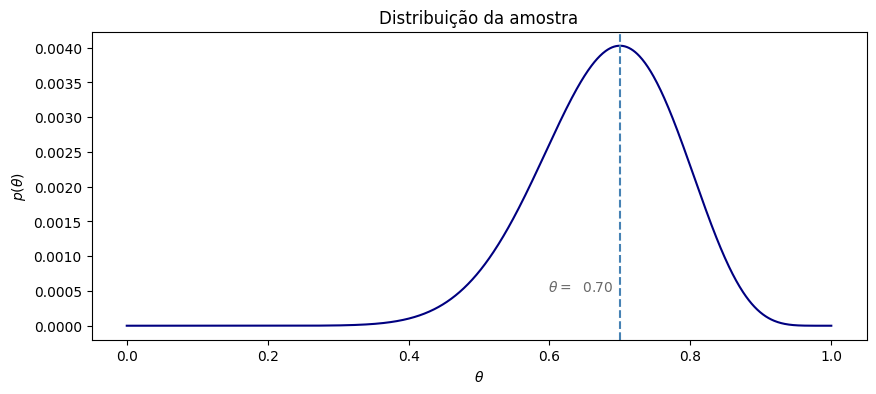

In [18]:
# Verossimilhança
theta_obs = np.array([np.prod(bernoulli.pmf(moeda_obs, p)) for p in param])
theta_obs = theta_obs/np.sum(theta_obs)

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

MLE_index = np.argmax(theta_obs)
MLE = param[MLE_index]

aux = np.mean(moeda_obs)
plt.plot(param, theta_obs, color='navy')
plt.axvline(x=MLE, color='steelblue', linestyle='--')
ax.text(MLE-0.01, 0.0005, r'$\theta=$'+ '{:6.2f}'.format(MLE), ha='right', **style)
# Label the axes
ax.set(title='Distribuição da amostra', xlabel=r'$\theta$', ylabel=r'$p(\theta)$')
plt.show()

Embora as observações de nossa distribuição amostral indiquem uma probabilidade mais perto de $0.77$, temos uma crença inicial de que nosso parâmetro é $\theta = 0.5$. A nossa distribuição posterior levará em conta nossa observação e nossas crenças, de modo que:
$$
p(H|E) \propto p(E|H) * p(H)\ OU \ Posterior\ \propto Verossimilhança\ *  Prior
$$

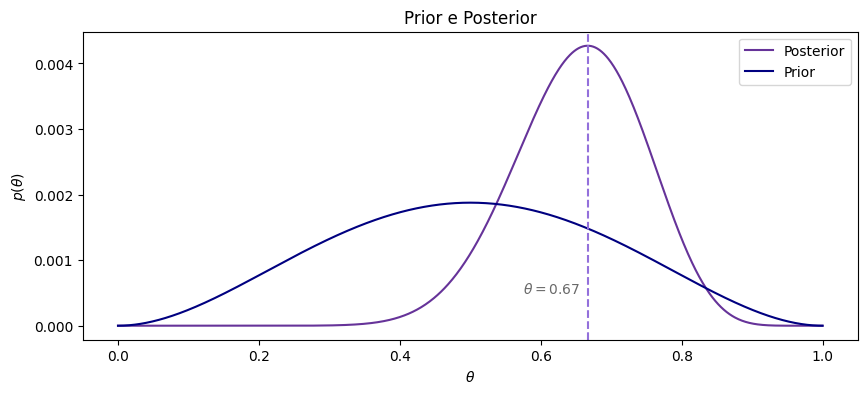

In [19]:
theta_posterior = [theta_prior[i] * theta_obs[i] for i in range(len(theta_prior))]
theta_posterior = theta_posterior/np.sum(theta_posterior)

MLE_index = np.argmax(theta_posterior)
MLE = param[MLE_index]

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

plt.plot(param, theta_posterior, color = 'rebeccapurple',label='Posterior')
plt.plot(param, theta_prior, color='navy',label='Prior')
# Label the axes
plt.axvline(x=MLE, color='mediumpurple', linestyle='--')
ax.set(title='Prior e Posterior', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
ax.text(MLE-0.01, 0.0005, r'$\theta=$'+ '{:04.2f}'.format(MLE), ha='right', **style)
plt.legend()
plt.show()


Andamos muito pouco para estarmos convencidos de que nossa  moeda não é equilibrada.

O caminho agora é considerar a distribuição a posterior como prior...

In [20]:
theta_prior = theta_posterior

... E depois, pedimos ao nosso amigo para lançar a moeda $n=20$ vezes novamente.

In [21]:
# Verossimilhança
moeda_obs = np.random.binomial(n=1, p=0.77, size = 20)
print(moeda_obs)
theta_obs = np.array([np.prod(bernoulli.pmf(moeda_obs, theta)) for theta in param])
theta_obs = theta_obs/np.sum(theta_obs)

[1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1]


In [22]:
#Veja qual deveria ter sido seu chute antes desse segundo lançamento e qual o número de caras que saiu
print('Seu segundo chute deveria ser:{:4d}'.format(int(MLE*20)))
print('O número de caras do segundo lançamento foi:{:4d}'.format(sum(moeda_obs)))

Seu segundo chute deveria ser:  13
O número de caras do segundo lançamento foi:  14


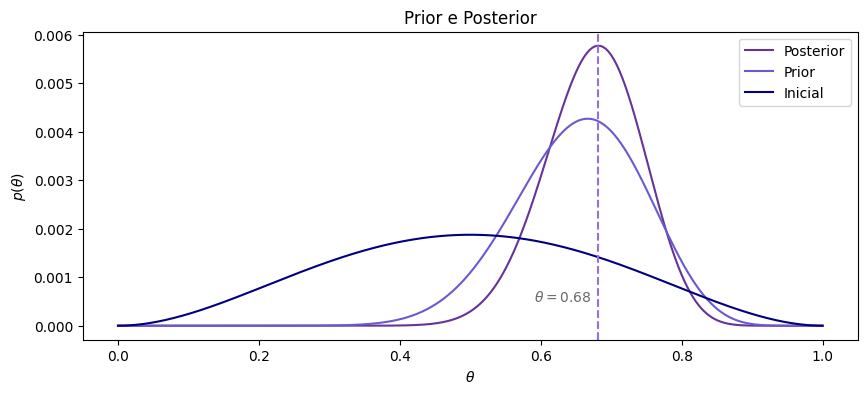

In [23]:
theta_posterior = [theta_prior[i] * theta_obs[i] for i in range(len(theta_prior))]
theta_posterior = theta_posterior/np.sum(theta_posterior)

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

MLE_index = np.argmax(theta_posterior)
MLE = param[MLE_index]

plt.plot(param, theta_posterior, color = 'rebeccapurple',label='Posterior')
plt.plot(param, theta_prior, color='slateblue',label='Prior')
plt.plot(param, theta_initial, color='navy',label='Inicial')
plt.axvline(x=MLE, color='mediumpurple', linestyle='--')
ax.text(MLE-0.01, 0.0005, r'$\theta=$'+ '{:04.2f}'.format(MLE), ha='right', **style)
ax.set(title='Prior e Posterior', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.legend()
plt.show()

Percebeu que, a cada 20 lançamentos, seu *chute* será mais direcionado?

### <font color=green > Faça você...
<font color=green > No Moodle, será definida uma crença inicial e o valor valor $p$ de probabilidade de número de caras da moeda que seu amigo irá jogar.
Quanto à crença inicial, serão definidos dois dados:
1. se a moeda é honesta, é viesada para maior número de caras, ou é viesada para maior número de coroas;
2. se a sua crença será forte ou fraca.

<font color=green > Com esses dados, escreva um texto que deve ser ilustrado por, no mínimo, 3 gráficos. O texto deve conter a definição, com justificativa, de quais seriam seus 3 "chutes": inicial, e depois de cada vez que seu amigo joga 20x a moeda. Escreva também as suas conclusões a respeito do desempenho de seus resultados. Os 3 gráficos sugeridos são:
1. crença inicial;
2. sua crença atualizada após a primeira vez que seu amigo joga a moeda 20x,
3. sua crença atualizada após a segunda vez que seu amigo joga a moeda 20x.